# Results for mass decorrelated ttH(bb) classifier approach

Datasets: Delphes Simulation of ttH(bb) and ttbb (SL)

flattened ntuples can be found here: /pnfs/psi.ch/cms/trivcat/store/user/creissel/tth/delphes/GC113e510558d4/

In [26]:
import numpy as np
import matplotlib.pyplot as plt

## Classification of dijet candidates
COBRA architecture using the following parameters:
- loss: categorical cross entropy
- test fraction: 0.1, validation fraction: 0.1
- batch size: 10000, epochs: 20, lr: 0.00001, decay: 0.0002
- dijet & lep layers: 64, 32, 16
- trijet layers: 128, 64, 32 
- dijet, lepton & trijet attention layers: 8,4
- attention layers: 128, 64

In [83]:
def plot_loss(path_results):
    
    results = np.loadtxt(path_results + "/metrics.csv", skiprows=1, delimiter=',')
    
    fig = plt.figure()
    plt.plot(results[:,0], results[:,3], label='training')
    plt.plot(results[:,0], results[:,6], label='validation')
    plt.legend()
    #plt.yscale('log')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    
    plt.show()

In [84]:
def calculate_confusion_matrix(path_inputs, path_results, sample):
    
    true = np.load(path_inputs + "target.npy")
    pred = np.load(path_results + "pred.npy")
    
    # get correct sample
    idx_train = np.load(path_results + "/idx_train.npy")
    idx_valid = np.load(path_results + "/idx_valid.npy")
    idx_mask = np.zeros((len(true),), dtype=bool)
    if sample == "train":
        idx_mask[idx_train] = True
    if sample == "valid":
        idx_mask[idx_valid] = True
    if sample == "test":
        idx_mask[idx_valid] = True
        idx_mask[idx_train] = True
        idx_mask = ~idx_mask
    
    true = np.argmax(true, axis=1)[idx_mask]
    pred = np.argmax(pred, axis=1)[idx_mask]
      
    m = np.zeros((45, 45))
    for evt in range(true.shape[0]):
        i = true[evt]
        j = pred[evt]
        m[i][j] += 1
        
    N_tot = np.sum(m)
    N_trace = np.trace(m)
    ratio = N_trace / float(N_tot)
    print("accuracy :", ratio)
   
    fig, ax = plt.subplots()
    im = ax.imshow(m, interpolation='nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fig.tight_layout()
    return ax

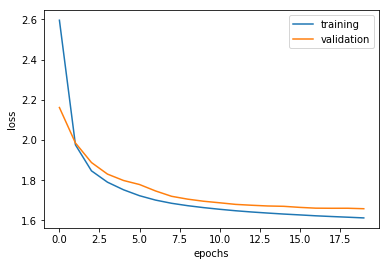

accuracy : 0.4395761890875958
accuracy : 0.4236518825781749
accuracy : 0.41876960851179923


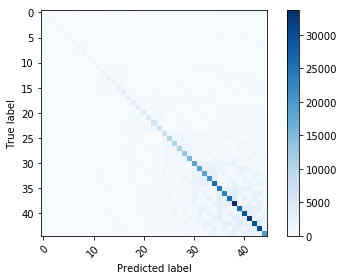

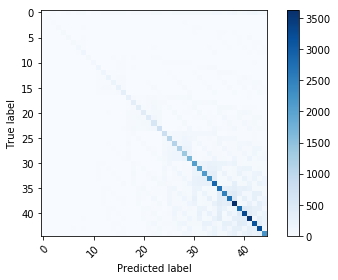

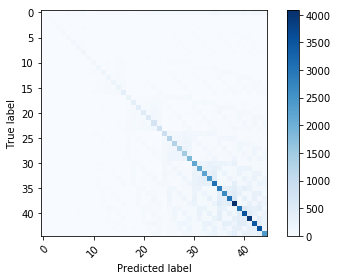

In [85]:
path_inputs = "/work/creissel/DATA/mass_regression_1l/comb/"
path_results = "/work/creissel/MODEL/Sep06/dijet_cand/"

plot_loss(path_results)

calculate_confusion_matrix(path_inputs, path_results, "train")
calculate_confusion_matrix(path_inputs, path_results, "valid")
calculate_confusion_matrix(path_inputs, path_results, "test")